In [2]:
from tensorflow import keras
import tensorflow as tf
import numpy as np
import sys
import matplotlib.pyplot as plot

print(tf.__version__)

2.10.0


In [9]:
# node = 10개
# hidden = 64개
#10*64 +64 마지막 64는 bios
# Sequential api
model_seq = keras.Sequential(name = 'model_seqential')
model_seq.add(keras.Input(shape=(10,),name='Inputlayer'))
model_seq.add(keras.layers.Dense(64,'relu',name = 'Hidden1'))
model_seq.add(keras.layers.Dropout(0.2,name="Dropout"))
model_seq.add(keras.layers.Dense(32,'relu',name='Hidden2'))
model_seq.add(keras.layers.Dense(10,'softmax','output'))
model_seq.summary()


Model: "model_seqential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden1 (Dense)             (None, 64)                704       
                                                                 
 Dropout (Dropout)           (None, 64)                0         
                                                                 
 Hidden2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 3,114
Trainable params: 3,114
Non-trainable params: 0
_________________________________________________________________


In [12]:
model_seq2 = keras.Sequential([
    keras.Input(shape=(10,),name='Inputlayer'),
    keras.layers.Dense(64,'relu',name = 'Hidden1'),
    keras.layers.Dropout(0.2,name="Dropout"),
    keras.layers.Dense(32,'relu',name='Hidden2'),
    keras.layers.Dense(10,'softmax','output')   
])
model_seq2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden1 (Dense)             (None, 64)                704       
                                                                 
 Dropout (Dropout)           (None, 64)                0         
                                                                 
 Hidden2 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 10)                330       
                                                                 
Total params: 3,114
Trainable params: 3,114
Non-trainable params: 0
_________________________________________________________________


In [17]:
## Functional Api
inputs = keras.Input(shape = (10,),name='Inputlayer')
hidden1 = keras.layers.Dense(64,'relu',name='hidden1')(inputs)
drop_out = keras.layers.Dropout(0.2,name='Dropout')(hidden1)
hidden2 = keras.layers.Dense(32,'relu',name='hidden2')(drop_out)
outputs = keras.layers.Dense(10,'softmax',name='output')(hidden2)
model_fun = keras.Model(inputs=inputs,outputs=outputs,name='Model_fun')

model_fun.summary()

Model: "Model_fun"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Inputlayer (InputLayer)     [(None, 10)]              0         
                                                                 
 hidden1 (Dense)             (None, 64)                704       
                                                                 
 Dropout (Dropout)           (None, 64)                0         
                                                                 
 hidden2 (Dense)             (None, 32)                2080      
                                                                 
 output (Dense)              (None, 10)                330       
                                                                 
Total params: 3,114
Trainable params: 3,114
Non-trainable params: 0
_________________________________________________________________


In [21]:
## Subclassing Api
## pytorch랑 포맷이 같다
## 빌드가 필요하다

class Model_sub(keras.Model):
    def __init__(self,hidden1,drop_rate,hidden2,outputs):
        super(Model_sub,self).__init__(name='Model_sub')
        self.hidden1 = keras.layers.Dense(hidden1,name = 'relu')
        self.drop_out = keras.layers.Dropout(drop_rate)
        self.hidden2 = keras.layers.Dense(hidden2,'relu')
        self.outputs = keras.layers.Dense(outputs,'softmax')


    def call(self,inputs):
        x = self.hidden1(inputs)
        x = self.drop_out(x)
        x = self.hidden2(x)
        x = self.outputs(x)

        return x
    

mymodel_sub = Model_sub(64,0.2,32,10)

mymodel_sub.build(input_shape=(1,10))
mymodel_sub.summary()

Model: "Model_sub"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 relu (Dense)                multiple                  704       
                                                                 
 dropout_3 (Dropout)         multiple                  0         
                                                                 
 dense_11 (Dense)            multiple                  2080      
                                                                 
 dense_12 (Dense)            multiple                  330       
                                                                 
Total params: 3,114
Trainable params: 3,114
Non-trainable params: 0
_________________________________________________________________


In [ ]:
class sub (keras.Model):
    def __init__(self,hidden1,dropout_rate,hidden2,outputs):
        super(Model_sub,self).__init__(name  = 'Model_sub')
        self.hidden1 = keras.layers.Dense(hidden1,'relu')
        self.drop_out = keras.layers.Dropout(dropout_rate)
        self.hidden2 = keras.layers.Dense(hidden2,'relu')
        self.outputs = keras.layers.Dense(outputs,'softmax')

    def call(self,inputs):
        x = self.hidden1(input)
        x = self.drop_out(x)
        x = self.hidden2(x)
        x = self.output(x)

        return x
    

In [24]:
dataset = np.loadtxt('./pima-indians-diabetes.csv',delimiter=',')
dataset.shape

(768, 9)

In [28]:
x = dataset[:,:-1]
y = dataset[:,-1]

print(x.shape,y.shape)

(768, 8) (768,)


In [49]:
## Subclassing

class DM(keras.Model):
    def __init__(self,hidden1,drop_out,hidden2,outputs):
        super(DM,self).__init__()
        self.hidden1 = keras.layers.Dense(hidden1,'relu')
        self.dropout = keras.layers.Dropout(drop_out)
        self.hidden2 = keras.layers.Dense(hidden2,'relu')
        self.outputs = keras.layers.Dense(outputs,'sigmoid')

    def call(self,inputs):
        x = self.hidden1(inputs)
        x = self.dropout(x)
        x = self.hidden2(x)
        x = self.outputs(x) 
        
        return x
    
dm_model = DM(64,0.2,32,1)

In [ ]:
INPUT_SIZE = (1, 28, 28)

input = tf.placeholder(tf.float32, shape = INPUT_SIZE)
dropout = tf.keras.layers.Dropout(rate = 0.2)(input)
conv = tf.keras.layers.Conv1D(
         filters=10,
         kernel_size=3,
         padding='same',
         activation=tf.nn.relu)(dropout)
max_pool = tf.keras.layers.MaxPool1D(pool_size = 3, padding = 'same')(conv)
flatten = tf.keras.layers.Flatten()(max_pool)
hidden = tf.keras.layers.Dense(units = 50, activation = tf.nn.relu)(flatten)
output = tf.keras.layers.Dense(units = 10, activation = tf.nn.softmax)(hidden)

In [62]:
import tensorflow as tf
from tensorflow.keras import preprocessing

samples = ['너 오늘 이뻐 보인다', 
           '나는 오늘 기분이 더러워', 
           '끝내주는데, 좋은 일이 있나봐', 
           '나 좋은 일이 생겼어', 
           '아 오늘 진짜 짜증나', 
           '환상적인데, 정말 좋은거 같아']

targets = np.array([[1], [0], [1], [1], [0], [1]])

tokenizer = preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(samples)
sequences = tokenizer.texts_to_sequences(samples)

word_index = tokenizer.word_index


print(tokenizer.word_counts)
print(tokenizer.word_index)

OrderedDict([('너', 1), ('오늘', 3), ('이뻐', 1), ('보인다', 1), ('나는', 1), ('기분이', 1), ('더러워', 1), ('끝내주는데', 1), ('좋은', 2), ('일이', 2), ('있나봐', 1), ('나', 1), ('생겼어', 1), ('아', 1), ('진짜', 1), ('짜증나', 1), ('환상적인데', 1), ('정말', 1), ('좋은거', 1), ('같아', 1)])
{'오늘': 1, '좋은': 2, '일이': 3, '너': 4, '이뻐': 5, '보인다': 6, '나는': 7, '기분이': 8, '더러워': 9, '끝내주는데': 10, '있나봐': 11, '나': 12, '생겼어': 13, '아': 14, '진짜': 15, '짜증나': 16, '환상적인데': 17, '정말': 18, '좋은거': 19, '같아': 20}


In [59]:
sequence=tokenizer.texts_to_sequences(samples)
display(sequence)


input_sequence = np.array(sequence)


[[4, 1, 5, 6],
 [7, 1, 8, 9],
 [10, 2, 3, 11],
 [12, 2, 3, 13],
 [14, 1, 15, 16],
 [17, 18, 19, 20]]

In [67]:
## 감성분석

batch_size = 2
num_epochs = 200
word_index = tokenizer.word_index
vocab_size = len(word_index)+ 1
emb_size = 128
hidden1 = 156
hidden2 = 1

# sentiment_model = keras.Sequential()
# sentiment_model.add(keras.Input(4,))
# sentiment_model.add(keras.layers.Embedding(vocab_size,emb_size))
# sentiment_model.add(keras.layers.Lambda(lambda x: tf.reduce_mean(x,axis=1)))
# sentiment_model.add(keras.layers.Dense(hidden1,'relu'))
# sentiment_model.add(keras.layers.Dense(hidden2,'sigmoid'))

inputs = keras.Input(shape=(4,))
embdding_layer = keras.layers.Embedding(vocab_size,emb_size)(inputs)
mean_emb = tf.reduce_mean(embdding_layer,axis = 1)
dense1 = keras.layers.Dense(hidden1,'relu')(mean_emb)
outputs = keras.layers.Dense(hidden2,'sigmoid')(dense1)
sentiment_model_fun = keras.Model(inputs=inputs,outputs=outputs)

# sentiment_model.summary()
sentiment_model_fun.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 4)]               0         
                                                                 
 embedding_7 (Embedding)     (None, 4, 128)            2688      
                                                                 
 tf.math.reduce_mean_3 (TFOp  (None, 128)              0         
 Lambda)                                                         
                                                                 
 dense_45 (Dense)            (None, 156)               20124     
                                                                 
 dense_46 (Dense)            (None, 1)                 157       
                                                                 


Total params: 22,969
Trainable params: 22,969
Non-trainable params: 0
_________________________________________________________________


In [68]:
# sentiment_model.compile(loss='binary_crossentropy',
#                         optomizer='adam',
#                         metrics = ['acc'])

# sentiment_model.fit(input_sequence,targets,epochs=100,batch_size=batch_size,
#                     validation_split=0.2)


In [75]:
class Sentiment_sub(keras.Model):
    def __init__(self,vocab_size,emb_size,hidden,outputs_node):
        super(Sentiment_sub,self).__init__()
        self.embedding = keras.layers.Embedding(vocab_size,emb_size)
        self.dense = keras.layers.Dense(hidden,'relu')
        self.outputs = keras.layers.Dense(outputs_node,'sigmoid')

    def call(self,inputs):
        x = self.embedding(x)
        x = tf.reduce_mean(x,axis=1)
        x = self.dense(x) 
        x = self.outputs(x)

        return x
    
Sentiment_sub = Sentiment_sub(vocab_size,emb_size,156,1)




In [78]:
import sklearn

print(sklearn.__version__)

1.2.2


In [102]:
from sklearn import datasets
import inspect
import pandas as pd
import matplotlib.pyplot as plt
iris_dataset = sklearn.datasets.load_iris()

type(iris_dataset)
iris_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [92]:
# print(iris_dataset['data'])
print(iris_dataset['target'])
print(iris_dataset['target_names'])
print(iris_dataset['feature_names'])


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [100]:
print(type(iris_dataset['data']))


iris = pd.DataFrame(iris_dataset['data'])
iris['target'] = iris_dataset['target']
iris.columns = ['sepal length', 'sepal width', 'petal length', 'petal width','class']
iris.head()

<class 'numpy.ndarray'>


,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [125]:
print(iris.columns)


Index(['sepal length', 'sepal width', 'petal length', 'petal width', 'class'], dtype='object')


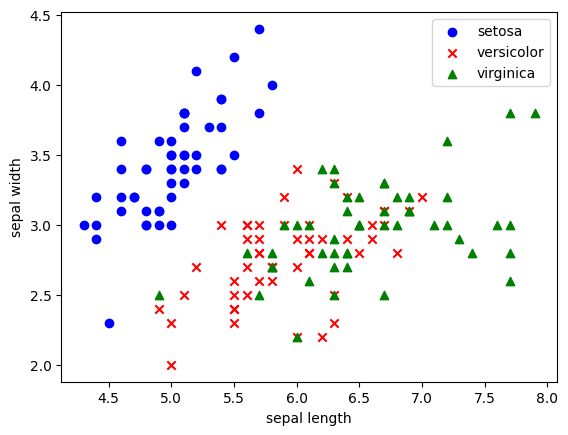

In [128]:
setosa = iris[iris['class']==0]
versicolor = iris[iris['class']==1]
virginica = iris[iris['class']==2]

# setosa.head()

plt.scatter(setosa['sepal length'], setosa['sepal width'], marker='o', color='b', label='setosa')
plt.scatter(versicolor['sepal length'], versicolor['sepal width'], marker='x', color='r', label='versicolor')
plt.scatter(virginica['sepal length'], virginica['sepal width'], marker='^', color='g', label='virginica')

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()


In [120]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

In [121]:
train_input,test_input,train_target,test_target = train_test_split(
    iris_dataset['data'],iris_dataset['target'],
    test_size=0.2
)

print(train_input.shape)
print(type(train_input),type(train_target))

(120, 4)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [114]:
ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)


In [123]:
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors=6)

In [124]:
params_knn = {'n_neighbors':range(1,10)}
gs_knn = GridSearchCV(estimator=knn,
                      param_grid=params_knn,
                      scoring='accuracy',cv=5,verbose=1)

gs_knn.fit(train_scaled,train_target)

print(gs_knn.best_params_)
print(gs_knn.best_score_)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
{'n_neighbors': 2}
0.45833333333333337
